# Question 3
The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the
data set is a 28x28 image. The data is divided into two sets of images: a training set and a
testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/.
Use only the training set to perform this part.

**(A)** Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of
samples, D is the number of input features, and d is the number of features selected by
the PCA algorithm. Note that you must compute the PCA computation method by
yourself. You may use preexisting functions for Eigen computation.

In [2]:
from mlxtend.data import loadlocal_mnist
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

X, y = loadlocal_mnist(images_path='./train-images-idx3-ubyte', labels_path='./train-labels-idx1-ubyte')
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])
#print('\n1st row of label', y[0])
#X = preprocessing.normalize(X)

Dimensions: 60000 x 784


Method for Reconstructing image 

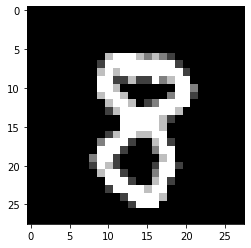

In [3]:
# The rest of columns are pixels
pixels = X[6508,:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels)

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

**a)**
 Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of
samples, D is the number of input features, and d is the number of features selected by
the PCA algorithm. Note that you must compute the PCA computation method by
yourself. You may use preexisting functions for Eigen computation.

In [4]:
def PCA (input_data, d):
    #Compute Mean of every Dimension 
    print('Dimensions: %s x %s' % (input_data.shape[0], input_data.shape[1]))
    x_mean = np.mean(input_data.T, axis=1)
    print(x_mean.shape[0])
    x_bar = X - x_mean
    print('Dimensions: %s x %s' % (x_bar.shape[0], x_bar.shape[1]))
    x_bar = preprocessing.normalize(x_bar)
    #Compute Covariance 
    x_cov = np.cov(x_bar.T)
    print(x_cov.shape[0], x_cov.shape[1])

    #Compute Eigen vector and Eigen values  
    eigvals, eigvecs = np.linalg.eig(x_cov)
    
    # Make a list of (eigenvalue, eigenvector) tuples, Sort eigen values 
    eig_pairs = [(np.abs(eigvals[i]), eigvecs[:,i]) for i in range(len(eigvals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    eig_matrix = eig_pairs[0][1].reshape(784,1)
    for i in range(1,d):
        nth_eig_vec = eig_pairs[i][1].reshape(784,1)
        eig_matrix = np.concatenate((eig_matrix, nth_eig_vec), axis=1)

    print(eig_matrix.shape[0], eig_matrix.shape[1])

    return x_bar, eig_matrix, eig_pairs

x_bar, x_eig_matrix, eig_pairs = PCA(X, 28)

transform_data = np.dot(x_eig_matrix.T, X.T)
print(transform_data.shape[0], transform_data.shape[1])
reconst_data= np.dot(x_eig_matrix, transform_data)
print(reconst_data.shape[0], reconst_data.shape[1])

Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 28
28 60000
784 60000


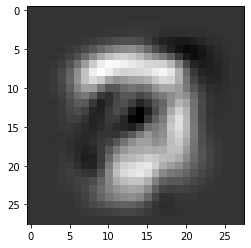

In [5]:
# The rest of columns are pixels
pixels = reconst_data[:,120].real
#print(pixels)
# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels)

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

**b)** Propose a suitable d using proportion of variance (POV) =95%.


In [6]:
# proportion of variance is calculated as ratio of sum of selected eigen vectors to tolat sum of eigen vectors 
sorted_eigen_list1 = []
sorted_eigen_list1 = list(zip(*eig_pairs))[0]
sorted_eigen_list2 = list(zip(*eig_pairs))[0]
print(type(sorted_eigen_list1))
sorted_eigen_list1 = list(sorted_eigen_list1)
#print(eig_pairs[0][1])
matrix_w = np.hstack((eig_pairs[0][1].reshape(784,1), eig_pairs[1][1].reshape(784,1)))
#print(matrix_w)
sum_eigen_val = 0

for i in range (0, len(sorted_eigen_list1)):
    sum_eigen_val  = sum_eigen_val + sorted_eigen_list1[i]
    
print("Sum of all Eigen values ", sum_eigen_val)
threshold_val = (sum_eigen_val)*(.95)
print("Threhold value", threshold_val)

sum = 0 
for i in range (0, len(sorted_eigen_list2)):
    sum = sum + sorted_eigen_list2[i]
    #print("value of sum", sum)
    if (sum >= threshold_val):
        print ("value of index", i)
        break; 

<class 'tuple'>
Sum of all Eigen values  0.9987476908895642
Threhold value 0.9488103063450859
value of index 152


**c) **  Program PCA reconstruction that takes 𝑌𝑃𝐶𝐴(dxN) and returns 𝑋̂ (DxN) (i.e., a
reconstructed image). For different values of d= {1, 20, 40, 60, 80, …, 760, 784}
reconstruct all samples and calculate the average mean square error (MSE). Plot MSE
(y-axis) versus d (x-axis). Discuss the results.

In [7]:
from sklearn.metrics import mean_squared_error

#d = [1, 2, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 500, 600, 700, 784]
d = [1, 2, 5, 8, 11, 14, 17, 20, 23, 27, 30, 33, 37, 45, 60, 80, 100, 150, 300, 500, 784]

mse  = []
for i in d:
    x_bar, x_eig_matrix, eig_pairs = PCA(X, i)
    transform_data = np.dot(x_eig_matrix.T, X.T)
    print(transform_data.shape[0], transform_data.shape[1])
    reconst_data= np.dot(x_eig_matrix, transform_data)
    print(reconst_data.shape[0], reconst_data.shape[1]) 

    mse.append(mean_squared_error(reconst_data,X.T))

print(mse)

Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 1
1 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 2
2 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 5
5 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 8
8 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 11
11 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 14
14 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 17
17 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 20
20 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 23
23 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 27
27 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 30
30 60000
784 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
78

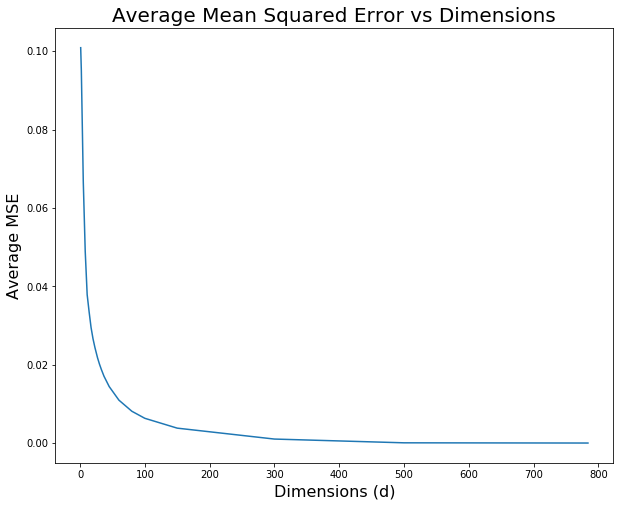

In [8]:
fig = plt.figure(figsize=(10,8))
d = [1, 2, 5, 8, 11, 14, 17, 20, 23, 27, 30, 33, 37, 45, 60, 80, 100, 150, 300, 500, 784]
ave_mse = []
for i in mse:
    ave_mse.append(i/60000)
#print(ave_mse)
#print(mse)
plt.plot(d, ave_mse)
plt.title("Average Mean Squared Error vs Dimensions", Fontsize=20)
plt.xlabel('Dimensions (d)', fontsize=16)
plt.ylabel('Average MSE', fontsize=16)
plt.show()

fig.savefig('q3_mse.jpg')


# Question 3 (d)

Reconstruct a sample from the class of number ‘8’ and show it as a ‘png’ image for d=
{1, 10, 50, 250, 784}. Discuss the results.






In [9]:
d = [1, 10, 50, 250, 784]

reconst_data_8  = []
for i in d:
    x_bar, x_eig_matrix, eig_pairs = PCA(X, i)
    transform_data = np.dot(x_eig_matrix.T, X.T)
    print(transform_data.shape[0], transform_data.shape[1])
    reconst_data= np.dot(x_eig_matrix, transform_data)
    reconst_data_8.append(reconst_data[:,6508])


Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 1
1 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 10
10 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 50
50 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 250
250 60000
Dimensions: 60000 x 784
784
Dimensions: 60000 x 784
784 784
784 784
784 60000


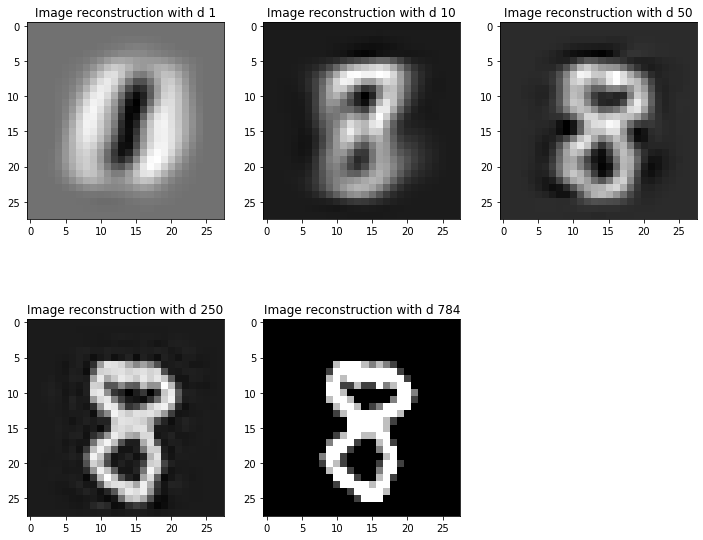

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(2, 3, 1)
plt.title("Image reconstruction with d 1")
plt.imshow(reconst_data_8[0].reshape(28,28), cmap='gray')
plt.subplot(2, 3, 2)
plt.title("Image reconstruction with d 10")
plt.imshow(reconst_data_8[1].reshape(28,28), cmap='gray')
plt.subplot(2, 3, 3)
plt.title("Image reconstruction with d 50")
plt.imshow(reconst_data_8[2].reshape(28,28), cmap='gray')
plt.subplot(2, 3, 4)
plt.title("Image reconstruction with d 250")
plt.imshow(reconst_data_8[3].reshape(28,28), cmap='gray')
plt.subplot(2, 3, 5)
plt.title("Image reconstruction with d 784")
plt.imshow(reconst_data_8[4].reshape(28,28), cmap='gray')
plt.savefig('q3_reconstruction of 8.jpg')
plt.show()

In [11]:
plt.subplot(2, 3, 1)
plt.imshow(reconst_data_8[0].reshape(28,28), cmap='gray')
image_5 = T_centered_data[0:1,:]
label_5 = Y_train[0]
reshaped_image = np.reshape(image_5, (28,28))

# Plotting image of 5
i = 0
j = 0
ax[i][j].imshow(reshaped_image, cmap='gray_r')
ax[i][j].set_title('Original Image from Dataset Digit Label: {}'.format(first_label))
# The rest of columns are pixels
pixels = reconst_data_8[0]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels)

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()





NameError: name 'T_centered_data' is not defined

# Question 3(e) 
For the values of d= {1, 2, 3, 4, …, 784} plot eigenvalues (y-axis) versus d (x-axis).
Discuss the results.

In [ ]:
sorted_eigen_list = list(zip(*eig_pairs))[0]
fig = plt.figure(figsize=(10,8))
plt.plot(np.arange(0,784), sorted_eigen_list)
plt.title("Eigen values vs Dimensions", Fontsize=20)
plt.xlabel('Dimensions (d)', fontsize=16)
plt.ylabel('Eigen Values', fontsize=16)
plt.show()

fig.savefig('q3_eigen_vector.jpg')